<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분류 과제
## 홍보광고학과 1910940 정예진

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", index_col = '가입자일련번호')
display(health.head())

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


#0. 글꼴 설정

In [4]:
mpl.rcParams['axes.unicode_minus'] = False
!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
print(sys_font)  

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarun

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumBarunGothic


#1. 데이터 탐색 및 전처리

In [6]:
display(health.isna().sum())

기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

결측치 행삭제 및 결측치 확인

In [7]:
health = health.dropna(subset = ['LDL콜레스테롤'], axis=0) 
health = health.dropna(subset = ['요단백'], axis=0) 
health = health.dropna(subset = ['음주여부'], axis=0) 
display(health.head())

print(health.isnull().sum())


,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
6,2020,27,M,9,185,85,94.0,1.2,1.2,1,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
7,2020,44,M,9,165,80,93.0,0.8,0.7,1,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
9,2020,41,F,17,150,50,82.0,0.4,0.5,2,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021


기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤            0
트리글리세라이드          0
HDL콜레스테롤          0
LDL콜레스테롤          0
혈색소               0
요단백               0
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              0
음주여부              0
구강검진수검여부          0
치아우식증유무        2706
치석             2706
데이터공개일자           0
dtype: int64


불필요한 변수 삭제

In [8]:
health.drop(columns='기준년도', inplace=True)
health.drop(columns='시도코드', inplace=True)
health.drop(columns='시력(좌)', inplace=True)
health.drop(columns='시력(우)', inplace=True)
health.drop(columns='청력(좌)', inplace=True)
health.drop(columns='청력(우)', inplace=True)
health.drop(columns='구강검진수검여부', inplace=True)
health.drop(columns='치아우식증유무', inplace=True)
health.drop(columns='치석', inplace=True)
health.drop(columns='데이터공개일자', inplace=True)
display(health.head())

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,
1,M,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
5,F,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No
6,M,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes
7,M,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes
9,F,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,No


변수 이름 변경


In [9]:
health = health.rename(columns = {'성별코드': '성별'}) 
health = health.rename(columns = {'연령대코드(5세단위)': '연령대'}) 
health = health.rename(columns = {'신장(5Cm단위)': '신장'}) 
health = health.rename(columns = {'체중(5Kg 단위)': '체중'}) 

display(health.head())

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,
1,M,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
5,F,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No
6,M,9,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes
7,M,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes
9,F,17,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,No


연령대 코드를 나이로 변환

In [10]:
 #1 or 2 : 0대, 3 or 4 : 10대, 5 or 6 : 20대, 7 or 8 : 30대, 9 or 10 : 40대, 11 or 12 : 50대, 13 or 14 : 60대, 15 or 16 : 70대, 17 or 18 : 80대

health.loc[health['연령대'] == 9, '연령대'] = 40
health.loc[health['연령대'] == 10, '연령대'] = 40
health.loc[health['연령대'] == 11, '연령대'] = 50
health.loc[health['연령대'] == 12, '연령대'] = 50
health.loc[health['연령대'] == 13, '연령대'] = 60
health.loc[health['연령대'] == 14, '연령대'] = 60
health.loc[health['연령대'] == 15, '연령대'] = 70
health.loc[health['연령대'] == 16, '연령대'] = 70
health.loc[health['연령대'] == 17, '연령대'] = 80
health.loc[health['연령대'] == 18, '연령대'] = 80

display(health)

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
가입자일련번호,,,,,,,,,,,,,,,,,,,,
1,M,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No
5,F,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No
6,M,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes
7,M,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes
9,F,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,F,60,150,70,96.0,129.0,79.0,90.0,110.0,132.0,35.0,49.0,14.8,1.0,0.8,23.0,24.0,15.0,No,No
9990,F,70,145,70,94.0,132.0,82.0,93.0,172.0,104.0,65.0,86.0,13.5,1.0,0.7,19.0,15.0,11.0,No,No
9992,M,70,155,45,70.0,117.0,67.0,121.0,151.0,74.0,54.0,82.0,13.0,1.0,1.4,20.0,13.0,16.0,No,No


비만도를 계산하여 새 변수로 생성

In [11]:
health['BMI'] = round(health['체중']/((health['신장']/100)*(health['신장']/100)),1)

display(health.head())

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,M,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,22.0
5,F,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,20.8
6,M,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,...,147.0,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes,24.8
7,M,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,...,40.0,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes,29.4
9,F,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,...,101.0,13.3,1.0,0.7,42.0,48.0,39.0,No,No,22.2


맥압을 새 변수로 생성

In [12]:
health['맥압'] = health['수축기혈압']-health['이완기혈압']

display(health.head())

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI,맥압
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,M,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,15.0,1.0,1.1,21.0,27.0,21.0,No,No,22.0,48.0
5,F,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,12.4,1.0,0.7,18.0,17.0,14.0,No,No,20.8,55.0
6,M,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,...,16.4,1.0,1.1,25.0,32.0,26.0,Yes,Yes,24.8,42.0
7,M,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,...,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes,29.4,39.0
9,F,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,...,13.3,1.0,0.7,42.0,48.0,39.0,No,No,22.2,71.0


고혈압 여부를 새 변수로 생성

In [13]:
# health.loc[(health['수축기혈압'] < 120) & (health['이완기혈압'] < 80), '고혈압'] = "정상"
# health.loc[(health['수축기혈압'] >= 120) & (health['수축기혈압'] < 140) & (health['이완기혈압'] >= 80) & (health['이완기혈압'] < 90), '고혈압'] = "고전"
# health.loc[(health['수축기혈압'] >= 140) & (health['수축기혈압'] < 160) & (health['이완기혈압'] >= 90) & (health['이완기혈압'] < 100), '고혈압'] = "고1"
# health.loc[(health['수축기혈압'] >= 160) & (health['이완기혈압'] >= 100), '고혈압'] = "고2"

# display(health)

당뇨 여부를 새 변수로 생성

In [14]:
health.loc[health['식전혈당(공복혈당)'] >= 126, '당뇨'] = "Yes"
health.loc[health['식전혈당(공복혈당)'] < 126, '당뇨'] = "No"

display(health.head())

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI,맥압,당뇨
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,M,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,1.0,1.1,21.0,27.0,21.0,No,No,22.0,48.0,No
5,F,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,1.0,0.7,18.0,17.0,14.0,No,No,20.8,55.0,No
6,M,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,24.8,42.0,No
7,M,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,29.4,39.0,Yes
9,F,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,...,1.0,0.7,42.0,48.0,39.0,No,No,22.2,71.0,No


비만도를 새 변수로 생성

In [15]:
health.loc[health['BMI'] < 18.5, '비만도'] = "저체중"
health.loc[(health['BMI'] >= 18.5) & (health['BMI'] < 23), '비만도'] = "정상"
health.loc[(health['BMI'] >= 23) & (health['BMI'] < 25), '비만도'] = "과체중"
health.loc[(health['BMI'] >= 25) & (health['BMI'] < 30), '비만도'] = "비만"
health.loc[health['BMI'] >= 30, '비만도'] = "고도비만"

display(health)

,성별,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI,맥압,당뇨,비만도
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,M,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,...,1.1,21.0,27.0,21.0,No,No,22.0,48.0,No,정상
5,F,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,...,0.7,18.0,17.0,14.0,No,No,20.8,55.0,No,정상
6,M,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,...,1.1,25.0,32.0,26.0,Yes,Yes,24.8,42.0,No,과체중
7,M,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,...,0.7,18.0,20.0,35.0,Yes,Yes,29.4,39.0,Yes,비만
9,F,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,...,0.7,42.0,48.0,39.0,No,No,22.2,71.0,No,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,F,60,150,70,96.0,129.0,79.0,90.0,110.0,132.0,...,0.8,23.0,24.0,15.0,No,No,31.1,50.0,No,고도비만
9990,F,70,145,70,94.0,132.0,82.0,93.0,172.0,104.0,...,0.7,19.0,15.0,11.0,No,No,33.3,50.0,No,고도비만
9992,M,70,155,45,70.0,117.0,67.0,121.0,151.0,74.0,...,1.4,20.0,13.0,16.0,No,No,18.7,50.0,No,정상


범주형 변수를 분류 모델에 적용하기 위해 더미변수로 설정

In [16]:
health_c = pd.get_dummies(health, columns = ['성별', '흡연상태', '음주여부', '당뇨', '비만도'])
display(health_c)

,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,흡연상태_Yes,음주여부_No,음주여부_Yes,당뇨_No,당뇨_Yes,비만도_고도비만,비만도_과체중,비만도_비만,비만도_저체중,비만도_정상
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,...,0,1,0,1,0,0,0,0,0,1
5,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,...,0,1,0,1,0,0,0,0,0,1
6,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,...,1,0,1,1,0,0,1,0,0,0
7,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,...,1,0,1,0,1,0,0,1,0,0
9,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,60,150,70,96.0,129.0,79.0,90.0,110.0,132.0,35.0,...,0,1,0,1,0,1,0,0,0,0
9990,70,145,70,94.0,132.0,82.0,93.0,172.0,104.0,65.0,...,0,1,0,1,0,1,0,0,0,0
9992,70,155,45,70.0,117.0,67.0,121.0,151.0,74.0,54.0,...,0,1,0,1,0,0,0,0,0,1


고지혈증 여부를 새 변수로 생성



In [17]:
health_c.loc[(health_c['총콜레스테롤'] >= 230) | (health_c['트리글리세라이드'] >= 200) | (health_c['LDL콜레스테롤'] >= 150) , '고지혈증'] = "Yes"
health_c.loc[(health_c['총콜레스테롤'] < 230) & (health_c['트리글리세라이드'] < 200) & (health_c['LDL콜레스테롤'] < 150) , '고지혈증'] = "No"
display(health_c.head())

,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,음주여부_No,음주여부_Yes,당뇨_No,당뇨_Yes,비만도_고도비만,비만도_과체중,비만도_비만,비만도_저체중,비만도_정상,고지혈증
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,...,1,0,1,0,0,0,0,0,1,No
5,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,...,1,0,1,0,0,0,0,0,1,No
6,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,...,0,1,1,0,0,1,0,0,0,Yes
7,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,...,0,1,0,1,0,0,1,0,0,Yes
9,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,...,1,0,1,0,0,0,0,0,1,No


고지혈증의 위험이 있는 케이스까지 포함하기 위해 세 변수의 조건을 or로 묶어주었다.
따라서 No로 분류되었다면 고지혈증의 위험에서 안전한 케이스이다.

#2. 분류 문제 설정 및 데이터 시각화

**독립변수 : 총콜레스테롤, 트리글리세라이드, LDL콜레스테롤을 제외한 health 변수**

'성별', '연령대', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       'HDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', 'BMI', '맥압', '당뇨',
       '비만도'

**종속변수 : 고지혈증**

---


고지혈증은 총콜레스테롤, 트리글리세라이드(중성지방), LDL콜레스테롤 수치 비교를 통해 판단된 변수이기 때문에 그 외의 고지혈증 여부에 영향을 미치는 요인(독립변수)을 알아보기 위해 세 가지 변수를 의도적으로 배제하였다.

In [18]:
print(health_c.columns)
display(health_c.info())
display(health_c.head())


Index(['연령대', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', 'BMI', '맥압', '성별_F', '성별_M',
       '흡연상태_No', '흡연상태_NotNow', '흡연상태_Yes', '음주여부_No', '음주여부_Yes', '당뇨_No',
       '당뇨_Yes', '비만도_고도비만', '비만도_과체중', '비만도_비만', '비만도_저체중', '비만도_정상', '고지혈증'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 1 to 10000
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연령대          3955 non-null   int64  
 1   신장           3955 non-null   int64  
 2   체중           3955 non-null   int64  
 3   허리둘레         3955 non-null   float64
 4   수축기혈압        3955 non-null   float64
 5   이완기혈압        3955 non-null   float64
 6   식전혈당(공복혈당)   3955 non-null   float64
 7   총콜레스테롤       3955 non-null   float64
 8   트리글리세라이드     3955 non-null   float64
 9   HDL콜레스테롤     3955 non-null   

None

,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,음주여부_No,음주여부_Yes,당뇨_No,당뇨_Yes,비만도_고도비만,비만도_과체중,비만도_비만,비만도_저체중,비만도_정상,고지혈증
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,...,1,0,1,0,0,0,0,0,1,No
5,50,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,...,1,0,1,0,0,0,0,0,1,No
6,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,...,0,1,1,0,0,1,0,0,0,Yes
7,40,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,...,0,1,0,1,0,0,1,0,0,Yes
9,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,...,1,0,1,0,0,0,0,0,1,No


In [19]:
health_c.describe()

,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,흡연상태_Yes,음주여부_No,음주여부_Yes,당뇨_No,당뇨_Yes,비만도_고도비만,비만도_과체중,비만도_비만,비만도_저체중,비만도_정상
count,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,...,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000,3955.000000
mean,53.077118,160.752212,62.670038,82.219039,124.537042,76.395196,103.566877,197.812137,125.477623,56.416485,...,0.170417,0.430594,0.569406,0.900885,0.099115,0.049052,0.202023,0.345638,0.035651,0.367636
std,11.353201,9.202345,12.150573,9.582892,14.716193,9.789144,23.980366,41.820961,67.253329,14.444209,...,0.376046,0.495222,0.495222,0.298854,0.298854,0.216004,0.401560,0.475636,0.185442,0.482223
min,40.000000,130.000000,30.000000,56.000000,78.000000,50.000000,58.000000,70.000000,14.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,155.000000,55.000000,75.000000,114.000000,70.000000,91.000000,168.000000,77.000000,46.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,160.000000,60.000000,82.000000,124.000000,77.000000,99.000000,197.000000,110.000000,55.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,170.000000,70.000000,88.200000,134.000000,82.000000,109.000000,225.000000,156.000000,65.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,80.000000,195.000000,120.000000,128.000000,199.000000,130.000000,473.000000,387.000000,399.000000,125.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No     2653
Yes    1302
Name: 고지혈증, dtype: int64


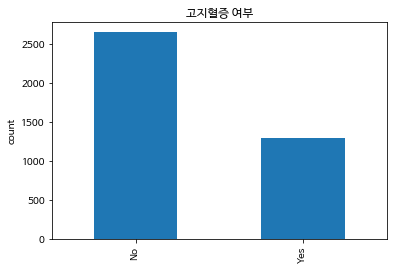

In [20]:
print(health_c['고지혈증'].value_counts())

fm._rebuild()

health_c['고지혈증'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('고지혈증 여부')
plt.show()

In [27]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=1588f3579b24ddebd6c97bc6956d252df19cb3112cce01d89427dfbbc625369d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [25]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.5 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [21]:
import mglearn

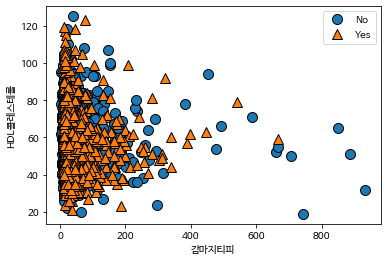

In [22]:
mglearn.discrete_scatter(health_c['감마지티피'], health_c['HDL콜레스테롤'], health_c['고지혈증'])
plt.xlabel("감마지티피")
plt.ylabel("HDL콜레스테롤")

plt.legend() #그래프에 범례 추가하기
plt.show()

아래(분류) 결과를 통해 감마지티피와 HDL콜레스테롤의 변수 중요도를 확인한 후, 총콜레스테롤과의 연관성을 산점도를 통해 알아보았다. 감마지티피수치가 낮은 쪽에 HDL콜레스테롤 수치가 높게 분포되어있고, 감마지티피수치가 높으면 HDL콜레스테롤 수치가 떨어지는 모양을 하고 있다.

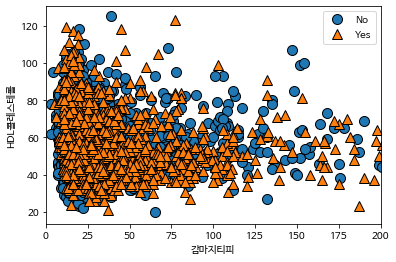

In [23]:
mglearn.discrete_scatter(health_c['감마지티피'], health_c['HDL콜레스테롤'], health_c['고지혈증'])
plt.xlabel("감마지티피")
plt.ylabel("HDL콜레스테롤")
plt.xlim(0, 200) #x축 범위

plt.legend() #그래프에 범례 추가하기
plt.show()

#3. 의사결정나무

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [25]:
health_new = health_c.reindex(['연령대', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       'HDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', 'BMI', '맥압', '성별_F', '성별_M',
       '흡연상태_No', '흡연상태_NotNow', '흡연상태_Yes', '음주여부_No', '음주여부_Yes', '당뇨_No',
       '당뇨_Yes', '비만도_고도비만', '비만도_과체중', '비만도_비만', '비만도_저체중', '비만도_정상', '고지혈증'], axis = 1) #고지혈증을 판단하는 데 쓰인 총콜레스테롤, 트리글리세라이드, LDL콜레스테롤 변수 제거

display(health_new)

,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),HDL콜레스테롤,혈색소,요단백,...,음주여부_No,음주여부_Yes,당뇨_No,당뇨_Yes,비만도_고도비만,비만도_과체중,비만도_비만,비만도_저체중,비만도_정상,고지혈증
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,40,165,60,72.1,127.0,79.0,90.0,58.0,15.0,1.0,...,1,0,1,0,0,0,0,0,1,No
5,50,155,50,75.2,144.0,89.0,110.0,53.0,12.4,1.0,...,1,0,1,0,0,0,0,0,1,No
6,40,185,85,94.0,114.0,72.0,86.0,50.0,16.4,1.0,...,0,1,1,0,0,1,0,0,0,Yes
7,40,165,80,93.0,112.0,73.0,250.0,26.0,15.7,1.0,...,0,1,0,1,0,0,1,0,0,Yes
9,80,150,50,82.0,136.0,65.0,104.0,63.0,13.3,1.0,...,1,0,1,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,60,150,70,96.0,129.0,79.0,90.0,35.0,14.8,1.0,...,1,0,1,0,1,0,0,0,0,No
9990,70,145,70,94.0,132.0,82.0,93.0,65.0,13.5,1.0,...,1,0,1,0,1,0,0,0,0,No
9992,70,155,45,70.0,117.0,67.0,121.0,54.0,13.0,1.0,...,1,0,1,0,0,0,0,0,1,No


In [26]:
x = health_new.iloc[:, :-1]
y = health_new['고지혈증']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(x_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.572


In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) #시험용 데이터 정확도가 가장 높게 가지치기
tree.fit(x_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(x_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(x_test, y_test)))

학습용 데이터 정확도: 0.706
시험용 데이터 정확도: 0.664


In [28]:
from sklearn.tree import export_graphviz
import graphviz

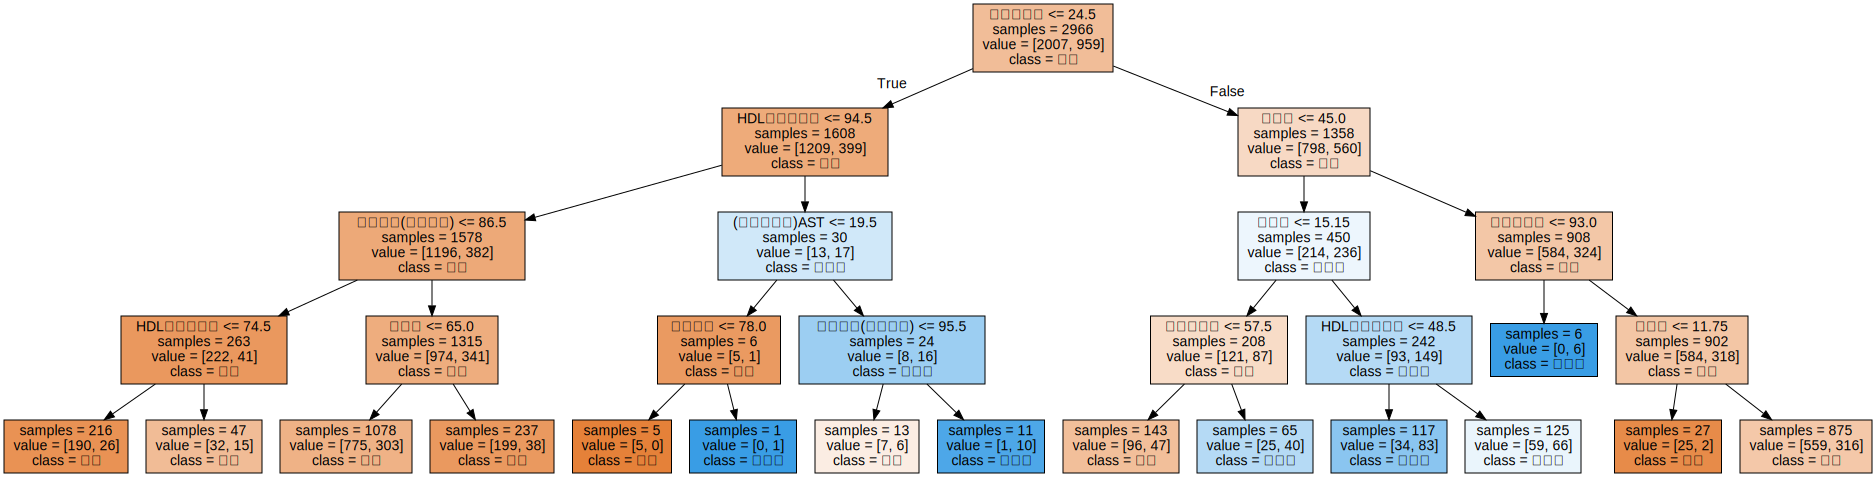

In [29]:
export_graphviz(tree, out_file="tree.dot", class_names=["정상", "비정상"],
                feature_names=health_new.columns[:-1], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [30]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.20145051 0.         0.         0.01487513 0.04459913 0.
 0.06314859 0.11809044 0.11635852 0.         0.         0.02142018
 0.         0.4200575  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


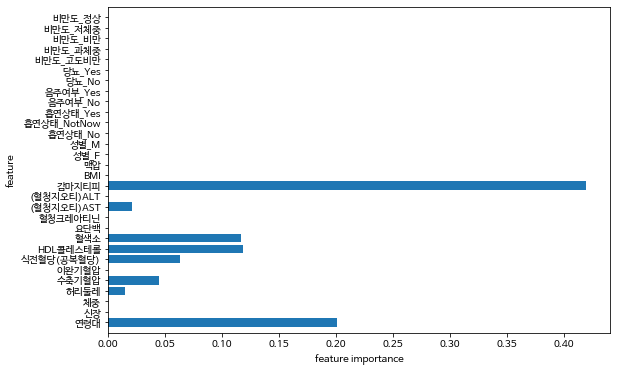

In [31]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_new.columns[0:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_new.columns[0:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health(tree)

In [32]:
res = pd.DataFrame(result)
res["name"] = health_new.columns[:-1]
display(res.info())

display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
 1   name    30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


None

,0,name
12,0.000000,(혈청지오티)ALT
11,0.021420,(혈청지오티)AST
14,0.000000,BMI
7,0.118090,HDL콜레스테롤
13,0.420057,감마지티피
23,0.000000,당뇨_No
24,0.000000,당뇨_Yes
15,0.000000,맥압
25,0.000000,비만도_고도비만
26,0.000000,비만도_과체중


#4. 랜덤 포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


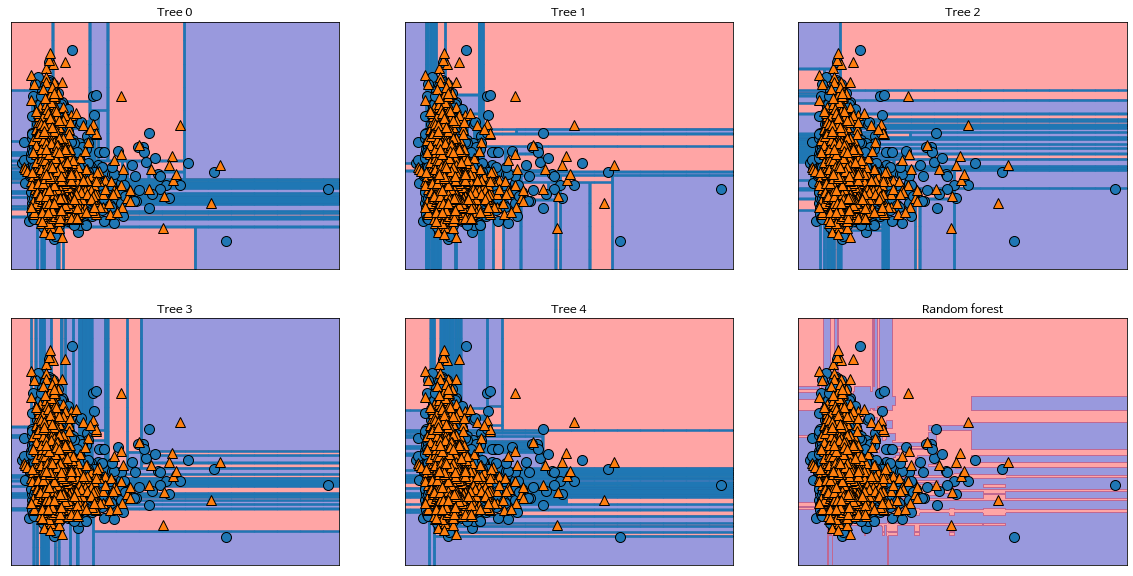

In [33]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train.iloc[:, 6:8], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x.iloc[:, 6:8].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x.iloc[:, 6:8].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(x.iloc[:, 6], x.iloc[:, 7], y)
plt.show()

In [34]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.677


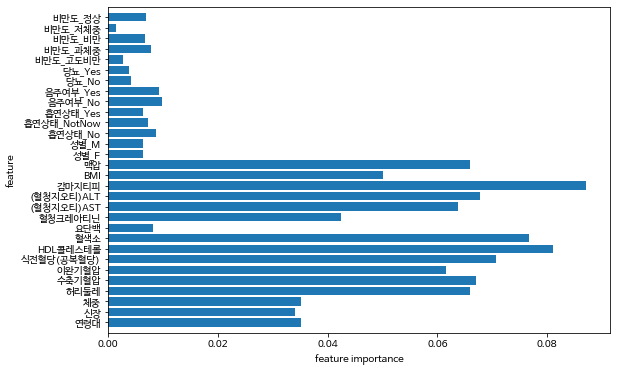

In [35]:
plot_feature_importances_health(forest)

#5. 그래디언트 부스팅



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

학습용 데이터 세트 정확도: 0.757
시험용 데이터 세트 정확도: 0.663


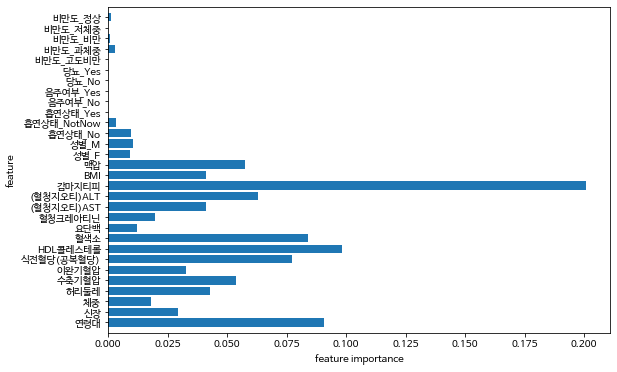

In [38]:
plot_feature_importances_health(gbrt)

In [39]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(x_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

학습 데이터 세트 정확도: 0.727
시험용 데이터 세트 정확도: 0.664


#6. 평가


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
dt_scores = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, x_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.54208754 0.5993266  0.57239057 0.58585859 0.61616162 0.62626263
 0.59121622 0.56081081 0.61486486 0.60810811]
Random forest:  [0.65993266 0.69023569 0.71380471 0.68350168 0.69023569 0.68013468
 0.68243243 0.68581081 0.72297297 0.68243243]
Gradient boosting:  [0.67340067 0.68686869 0.69023569 0.71717172 0.68013468 0.67676768
 0.69594595 0.69932432 0.69932432 0.6722973 ]
Accuracy mean
Decision tree :0.592
Random forest :0.689
Gradient boosting :0.689


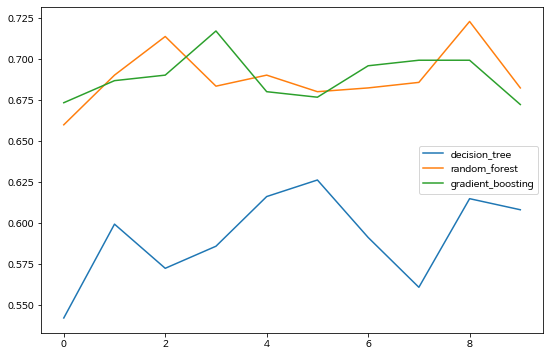

In [43]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],['gradient_boosting',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

열 번의 교차 검증을 했을 때 랜덤 포레스트와 그래디언트 부스팅의 정확도가 같은 결과가 나왔다.
그러나, 랜덤 포레스트의 경우 학습데이터에 대한 과적합을 해소하기 어려워 그래디언트 부스팅 모델을 선택하는 것이 적합하다고 판단했다.

#7. 인사이트

## 유의미한 독립변수

### 가설 배경
고지혈증이란 혈중에 지질 성분이 증가한 상태를 말한다. 알려진 바에 의하면 고지혈증은 유전적인 요인으로 인해 혈액 내에 특정 지질이 증가하여 발생하는 경우와, 비만이나 술, 당뇨병 등과 같은 다른 원인에 의해서 발생하는 경우로 나뉘어진다. 따라서 신장, 체중의 수치로 비만도를 계산한 변수와 공복혈당 수치로 당뇨의 여부를 판단한 변수를 생성했다. 그리고 이러한 독립변수들이 고지혈증을 분류하는 데 도움이 될 것이라고 예상하였다.

### 연구 결과
연구 결과 예상이 맞았던 지점은 HDL콜레스테롤의 변수 중요도가 높다는 것이었다. 콜레스테롤은 곧 지질이므로 HDL콜레스테롤은 고지혈증 판단에 이용되지 않았으나 총콜레스테롤이나 LDL콜레스테롤과 충분한 상관관계를 가지기 때문에 분류에 큰 비중을 차지할 것이라고 생각했다. 

예상이 빗나갔던 지점은 **감마지티피** 수치의 변수 중요도가 HDL콜레스테롤보다도 높다는 것이다. 간에 이상이 생기면 빠른 반응속도로 감마지티피 수치가 높아진다.

감마지티피의 높은 수치의 원인으로는 지나친 과음과 과체중으로 인한 지방간이 가장 많이 꼽힌다.
**이를 통해 비만이나 음주의 여부 대신 감마지티피 수치가 비만과 음주가 고지혈증의 원인이 될 수 있음을 방증한다는 것을 알 수 있었다.** 음주의 여부 변수는 건강검진 대상자들의 음주량까지 말해주지 못하므로 큰 상관관계를 보이지 못한 게 아닐까 추측했다.

또한 의사결정나무에서 **HDL콜레스테롤 수치 94.5**를 기준으로 정상과 비정상으로 나뉘는 것을 주목할 필요가 있다. HDL콜레스테롤 수치는 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 착한 콜레스테롤으로 많이 불리는데, 전문가에 의하면 HDL콜레스테롤 수치가 90을 넘어가면 오히려 심혈관 예후에 안 좋은 영향을 미치며, **이상지질혈증** 곧 고지혈증이 우려된다고 한다. HDL콜레스테롤 수치로 비정상으로 분류된 샘플 30개 중 24개는 높은 AST 수치로 비정상으로 분류되는데, AST 또한 간기능과 연관되어 있어 감마지티피 수치와 더불어 음주가 고지혈증의 원인임을 뒷받침하고 있다. 

### 느낀점

분류모델의 정확도가 65%~75%에 불과했음에도 건강검진 수치들의 상관관계가 의학적으로 밝혀진 사실들에 기반하는 것을 직접 분석해보니 더욱 흥미로운 데이터 분석을 할 수 있었던 것 같다. 